# Questions

1. What was the change in price of the stock over timne
2. What was the daily return of the stock on average
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How can we attempt to predict future stock behaviour?

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [16]:
import numpy as np

In [5]:
from pandas_datareader.data import DataReader

In [6]:
from datetime import datetime

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year - 1,end.month,end.day) # one year ago

In [9]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start,end) #globals() sets the string name 'AAPL' etc as the variable name

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.177580,190.170952,192.155079,192.194960,3.213269e+07,190.882598
std,21.004093,20.810844,20.891227,20.859001,1.345951e+07,21.090769
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.967499,173.747501,174.872501,174.832497,2.227185e+07,173.452965
50%,199.055000,193.930000,196.434998,197.000000,2.875150e+07,195.877899
75%,209.260006,205.594994,207.717499,207.912502,3.876472e+07,206.560455
max,229.929993,225.839996,227.029999,227.059998,9.574460e+07,227.059998


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-10-09 to 2019-10-09
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


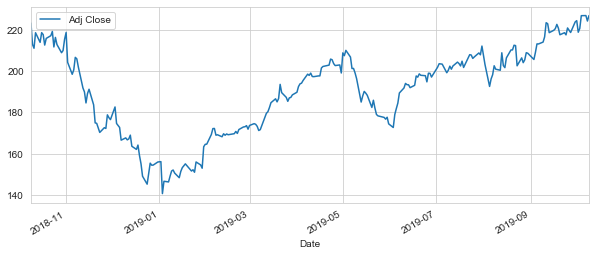

In [12]:
# historical view of the closing price
AAPL['Adj Close'].plot(legend=True, figsize =(10,4))

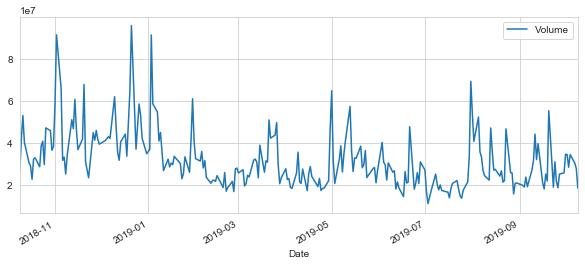

In [13]:
AAPL['Volume'].plot(legend=True, figsize = (10, 4))

In [18]:
# moving average for the stock
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    AAPL[column_name] = AAPL['Adj Close'].rolling(window = ma).mean()

AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2018-10-09,227.270004,222.250000,223.639999,226.869995,26891000.0,223.403275,NaN,NaN,NaN
2018-10-10,226.350006,216.050003,225.460007,216.360001,41990600.0,213.053894,NaN,NaN,NaN
2018-10-11,219.500000,212.320007,214.520004,214.449997,53124400.0,211.173065,NaN,NaN,NaN
2018-10-12,222.880005,216.839996,220.419998,222.110001,40337900.0,218.716034,NaN,NaN,NaN
2018-10-15,221.830002,217.270004,221.160004,217.360001,30791000.0,214.038605,NaN,NaN,NaN
2018-10-16,222.990005,216.759995,218.929993,222.149994,29184000.0,218.755417,NaN,NaN,NaN
2018-10-17,222.639999,219.339996,222.300003,221.190002,22885400.0,217.810089,NaN,NaN,NaN
2018-10-18,219.740005,213.000000,217.860001,216.020004,32581300.0,212.719086,NaN,NaN,NaN
2018-10-19,221.259995,217.429993,218.059998,219.309998,33078700.0,215.958801,NaN,NaN,NaN


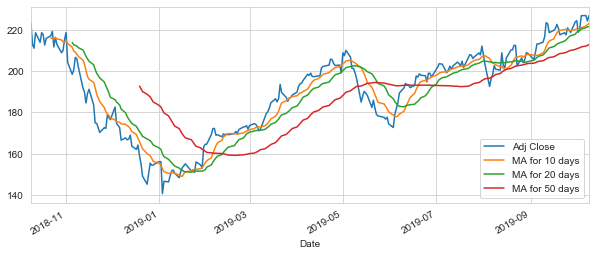

In [19]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize =(10,4))

### Daily returns

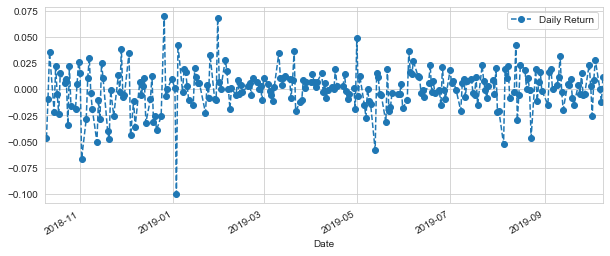

In [21]:
# getting the daily returns
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# plotting it
AAPL['Daily Return'].plot(figsize= (10,4), legend = True, linestyle = '--', marker = 'o')

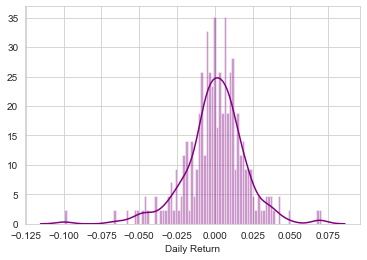

In [22]:
#average daily return with histogram
#ditplot puts two plots on top
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

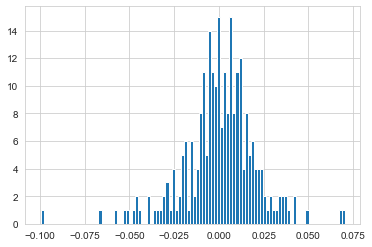

In [23]:
#alternative
AAPL['Daily Return'].hist(bins= 100)

### Analyse closing prices

In [12]:
# Just collecting the closingf price from all our stocks and storing them in a new df
closing_df = DataReader(tech_list,'yahoo', start, end)['Adj Close']

In [25]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-10-09,223.403275,1870.319946,1138.819946,110.523254
2018-10-10,213.053894,1755.250000,1081.219971,104.517632
2018-10-11,211.173065,1719.359985,1079.319946,104.271507
2018-10-12,218.716034,1788.609985,1110.079956,107.874870
2018-10-15,214.038605,1760.949951,1092.250000,105.935349


In [13]:
tech_rets = closing_df.pct_change()

In [28]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-10-09,NaN,NaN,NaN,NaN
2018-10-10,-0.046326,-0.061524,-0.050579,-0.054338
2018-10-11,-0.008828,-0.020447,-0.001757,-0.002355
2018-10-12,0.035719,0.040277,0.028499,0.034558
2018-10-15,-0.021386,-0.015465,-0.016062,-0.017979


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


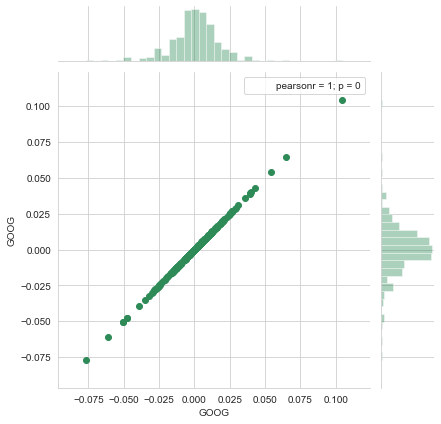

In [32]:
# comparing with two stocks
import scipy.stats as stats
sns.jointplot('GOOG','GOOG',tech_rets, kind = 'scatter', color = 'seagreen').annotate(stats.pearsonr)

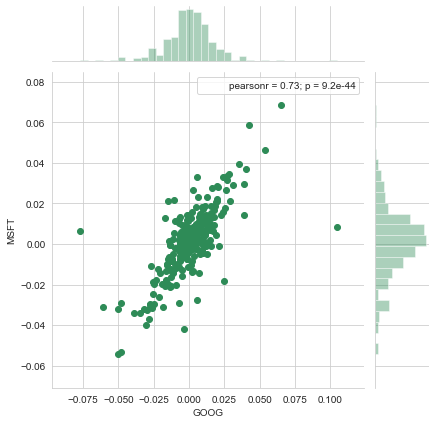

In [33]:
# compare two different stocks
sns.jointplot('GOOG','MSFT',tech_rets, kind = 'scatter', color = 'seagreen').annotate(stats.pearsonr)

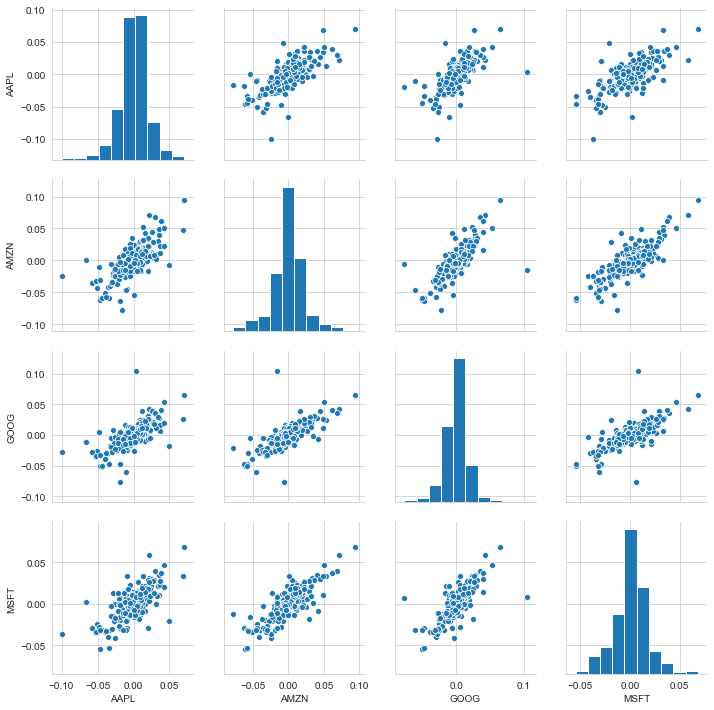

In [35]:
# plotting them all
sns.pairplot(tech_rets.dropna())

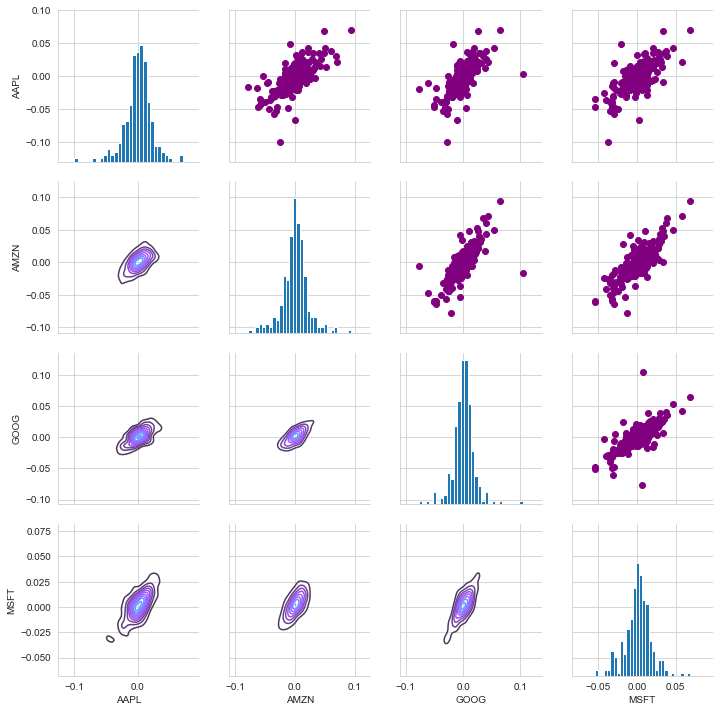

In [36]:
# pair grid
returns_fig = sns.PairGrid(tech_rets.dropna())
# above the diagonal
returns_fig.map_upper(plt.scatter, color = 'purple')
# below
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
#diagonals
returns_fig.map_diag(plt.hist, bins = 30)

### What about the closing prices?

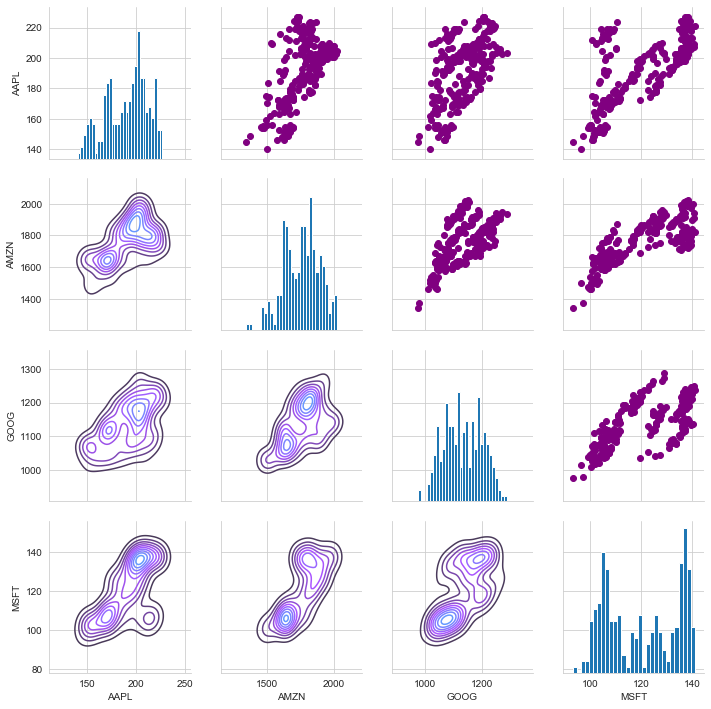

In [37]:

# pair grid
returns_fig = sns.PairGrid(closing_df)
# above the diagonal
returns_fig.map_upper(plt.scatter, color = 'purple')
# below
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
#diagonals
returns_fig.map_diag(plt.hist, bins = 30)

In [38]:
# correlation plot
sns.corrplot(tech_rets.dropna(), annot = True)

AttributeError: module 'seaborn' has no attribute 'corrplot'

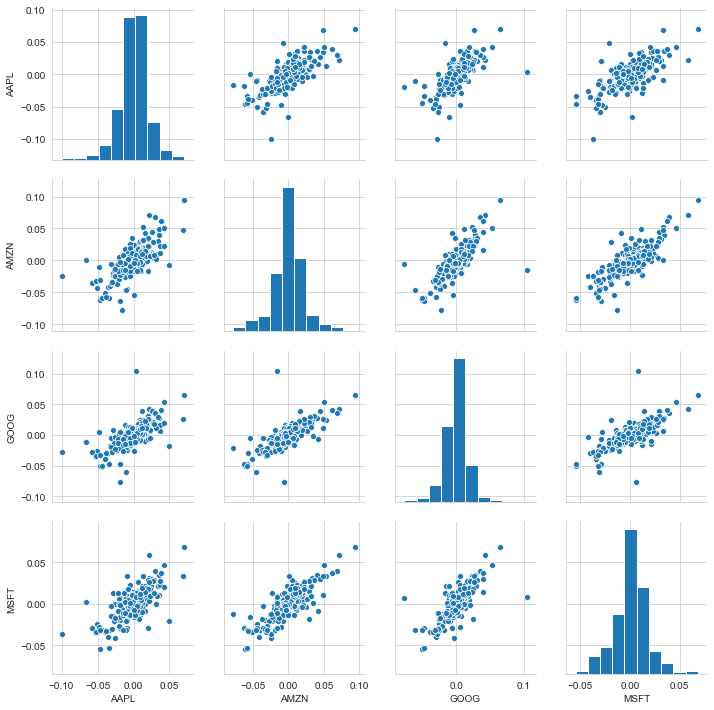

In [14]:
sns.pairplot(tech_rets.dropna())

# Risk Analysis

In [ ]:
#risk = sd of 

In [15]:
rets = tech_rets.dropna()

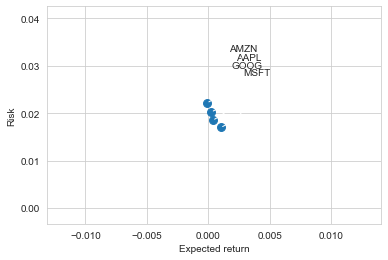

In [19]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
    )